In [0]:
#a = []
#while(1):
    #a.append("1")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [4]:
df=pd.read_excel("/content/drive/My Drive/DPA hackathon/TrainingSet_8VWz3PL.xlsx", encoding="latin-1")
df.tail()

,file,label
5214,6517,1
5215,6520,4
5216,6523,3
5217,6524,4
5218,6525,1


In [0]:
train_image = []
for i in df.index:
    img = image.load_img("/content/drive/My Drive/DPA hackathon/Training_Images/Image-"+str(df["file"][i])+".jpg",
                          target_size=(256,256,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
data = np.array(train_image)

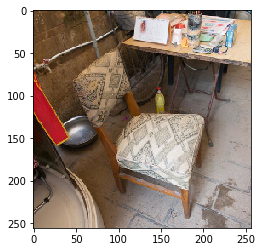

In [6]:
plt.imshow(data[43], cmap = 'gist_gray')

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
y=df['label']
y = to_categorical(y)
X = data

In [0]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 13, stratify=y)

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=["accuracy"])

In [11]:
model.fit(X_train,y_train, epochs = 10, batch_size = 50, verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





4697/4697 [==============================] - 748s 159ms/step - loss: 4.4989 - acc: 0.2629
Epoch 2/10
4697/4697 [==============================] - 733s 156ms/step - loss: 1.4779 - acc: 0.3658
Epoch 3/10
4697/4697 [==============================] - 729s 155ms/step - loss: 1.0907 - acc: 0.5799
Epoch 4/10
4697/4697 [==============================] - 732s 156ms/step - loss: 0.5218 - acc: 0.8207
Epoch 5/10
4697/4697 [==============================] - 734s 156ms/step - loss: 0.2668 - acc: 0.9223
Epoch 6/10
4697/4697 [==============================] - 731s 156ms/step - loss: 0.1837 - acc: 0.9483
Epoch 7/10
4697/4697 [==============================] - 729s 155ms/step - loss: 0.1262 - acc: 0.9651
Epoch 8/10
4697/4697 [==============================] - 734s 156ms/step - loss: 0.0950 - acc: 0.9736
Epoch 9/10
4697/4697 [==============================] - 737s 157ms/step - loss: 0.0767 - a

In [12]:
loss, acc = model.evaluate(X_test, y_test, verbose = 1)
print(acc * 100)

522/522 [==============================] - 17s 33ms/step
40.99616855953845


In [0]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [0]:
y_pred = model.predict_classes(X_test, batch_size=128, verbose=0)
y_pred = to_categorical(y_pred)

In [0]:
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

In [0]:
cm = confusion_matrix(y_test,y_pred)
f_score = f1_score(y_test,y_pred, average=None)
cr = classification_report(y_test,y_pred)

In [19]:
print(f_score)
print(cm)
print(cr)

[0.54       0.36633663 0.29292929 0.43478261 0.41350211]
[[54 17  7  5  6]
 [28 37 14  7 12]
 [11 19 29 18 27]
 [ 8 15 20 45 22]
 [10 16 24 22 49]]
              precision    recall  f1-score   support

           0       0.49      0.61      0.54        89
           1       0.36      0.38      0.37        98
           2       0.31      0.28      0.29       104
           3       0.46      0.41      0.43       110
           4       0.42      0.40      0.41       121

    accuracy                           0.41       522
   macro avg       0.41      0.42      0.41       522
weighted avg       0.41      0.41      0.41       522



In [0]:
from keras.models import model_from_json
from keras.models import load_model

In [21]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [1]:
def output(images):
    model = load_model("model.h5")
    y_pred = model.predict_classes(images, batch_size=128, verbose=0)
    return images